<a href="https://colab.research.google.com/github/Bibhukalyan/MvvmPractice/blob/master/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all the libraries

In [ ]:

import numpy as np
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline
import pandas as pd
import random

from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix
import seaborn as sb
from keras.datasets import mnist

#Loading MNIST dataset

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))




11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


#Plot the Data

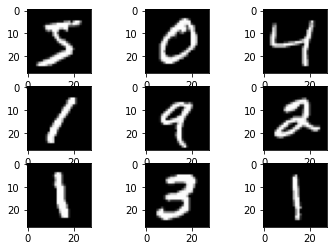

In [ ]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# Bayes Theorem

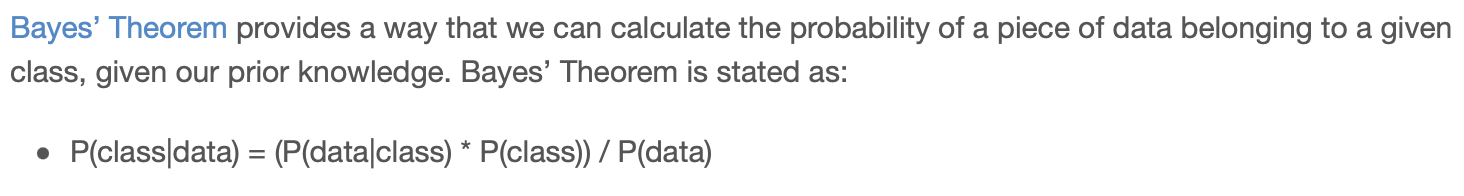

# Naive Bayes Classifier

Assumption : Attributes of a given class are independent of each other.

Steps:
1. Summarize all the classes using mean and standard deviation
2. Compute Gaussian probability distribution for each attribute in a sample
3. Compute class probabilities

1. Summarize class

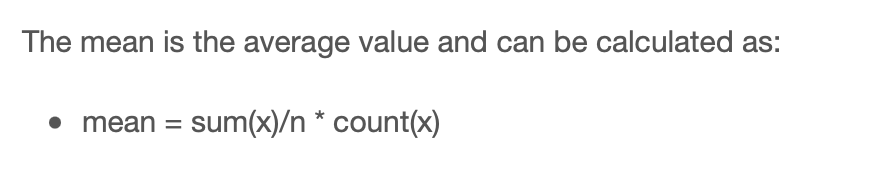

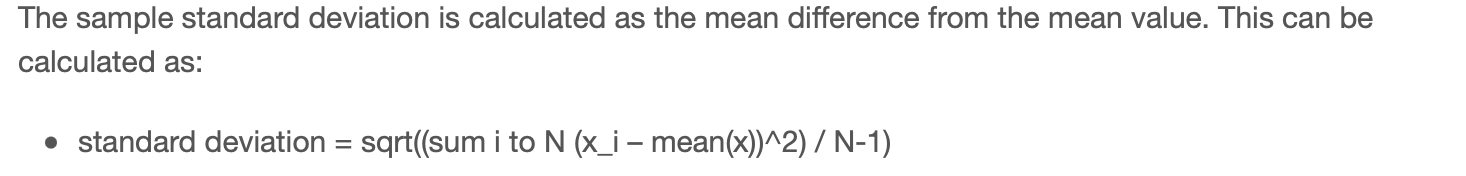

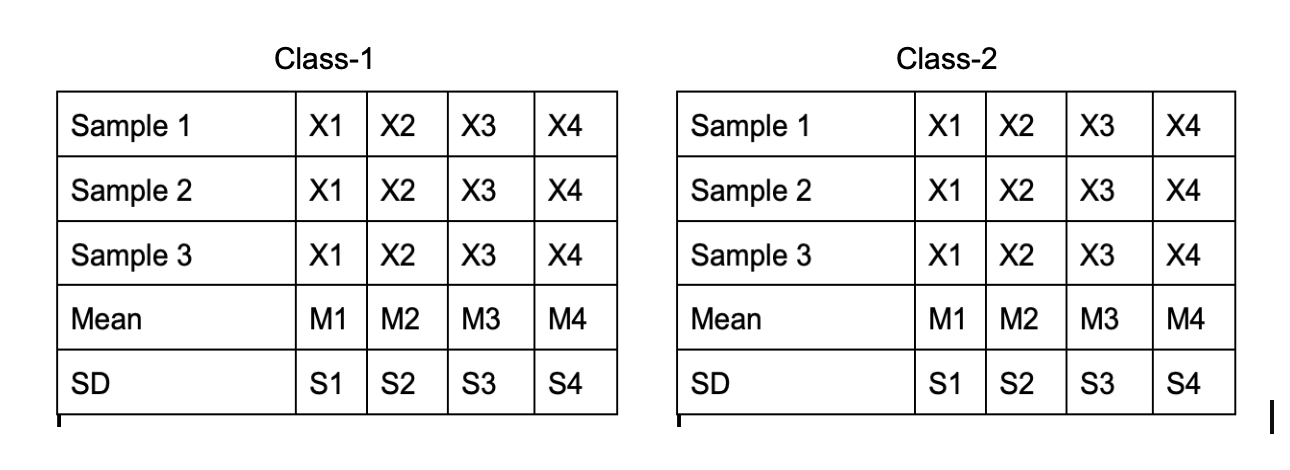

2. Gaussian PDF

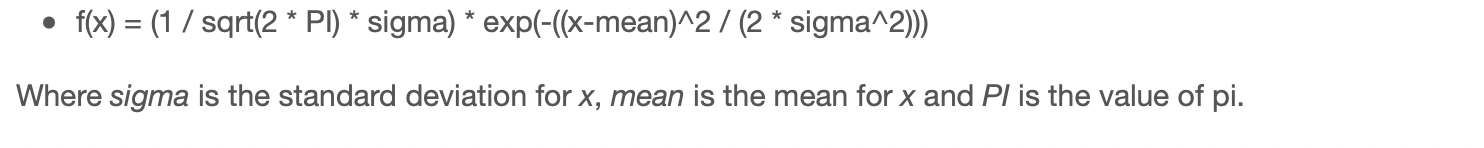

3. Compute Class probabilities

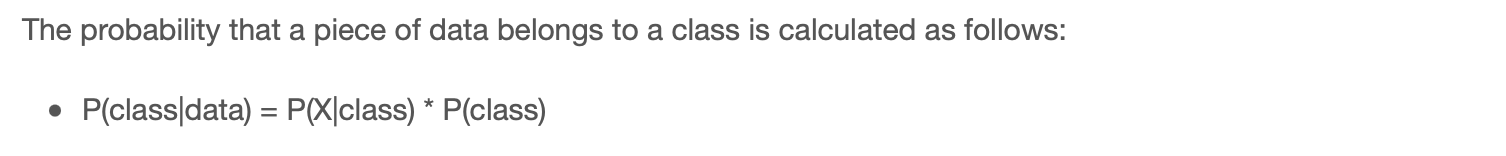
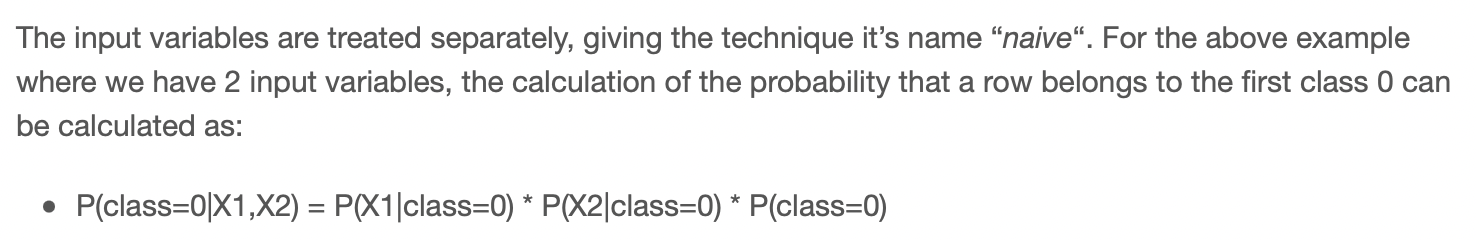

In [ ]:
def naivebayes(train, train_lb, test, test_lb, smoothing):
        n_class = np.unique(train_lb)
        print("Number of classes : ",n_class)
        tr = train
        te = test
        tr_lb = train_lb
        te_lb = test_lb
        
        smoothing = smoothing
        m, s, prior, count = [], [], [], []
        for i, val in enumerate(n_class):
            sep = [tr_lb == val] 
            
            count.append(len(tr_lb[sep]))
            prior.append(len(tr_lb[sep]) / len(tr_lb))
            m.append(np.mean(tr[sep], axis=0))
            s.append(np.std(tr[sep], axis=0))
        
        pred = []
        likelihood = []
        lcs = []
        for n in range(len(te_lb)):
            classifier = []
            sample = te[n] #test sample
            ll = []
            for i, val in enumerate(n_class):
                m1 = m[i]
                var = np.square(s[i]) + smoothing
                prob = 1 / np.sqrt(2 * np.pi * var) * np.exp(-np.square(sample - m1)/(2 * var))
                result = np.sum(np.log(prob))
                classifier.append(result)
                ll.append(prob)

            pred.append(np.argmax(classifier))
            likelihood.append(ll)
            lcs.append(classifier)
        
        return pred, likelihood

In [ ]:
def error_rate(confusion_matrix):
    a = confusion_matrix
    b = a.sum(axis=1)
    df = []
    for i in range(0,10):
        temp = 1-a[i][i]/b[i]
        df.append(temp)
    
    df = pd.DataFrame(df)
    df.columns = ['% Error rate']
    return df*100

In [ ]:
nb = naivebayes(train=train_X, train_lb=train_y, test=test_X, test_lb=test_y, smoothing=1000)
nb_pred = nb[0]

Number of classes :  [0 1 2 3 4 5 6 7 8 9]


<ipython-input-7-ab26779f672f>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  count.append(len(tr_lb[sep]))
<ipython-input-7-ab26779f672f>:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  prior.append(len(tr_lb[sep]) / len(tr_lb))
<ipython-input-7-ab26779f672f>:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  

# Results

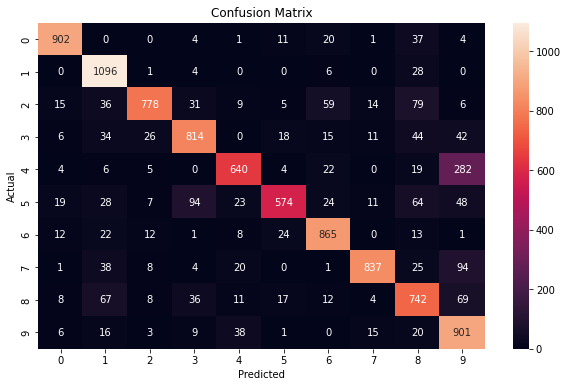

In [ ]:
cm = confusion_matrix(test_y, nb_pred)
#cm # X-axis Predicted vs Y-axis Actual Values
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()

In [ ]:
print("Test Accuracy:", round((sum(np.diagonal(cm)) / len(nb_pred)) * 100, 4), '%')

Test Accuracy: 81.49 %


In [ ]:
error_rate(cm)

,% Error rate
0,7.959184
1,3.436123
2,24.612403
3,19.405941
4,34.826884
5,35.650224
6,9.707724
7,18.579767
8,23.819302
9,10.703667


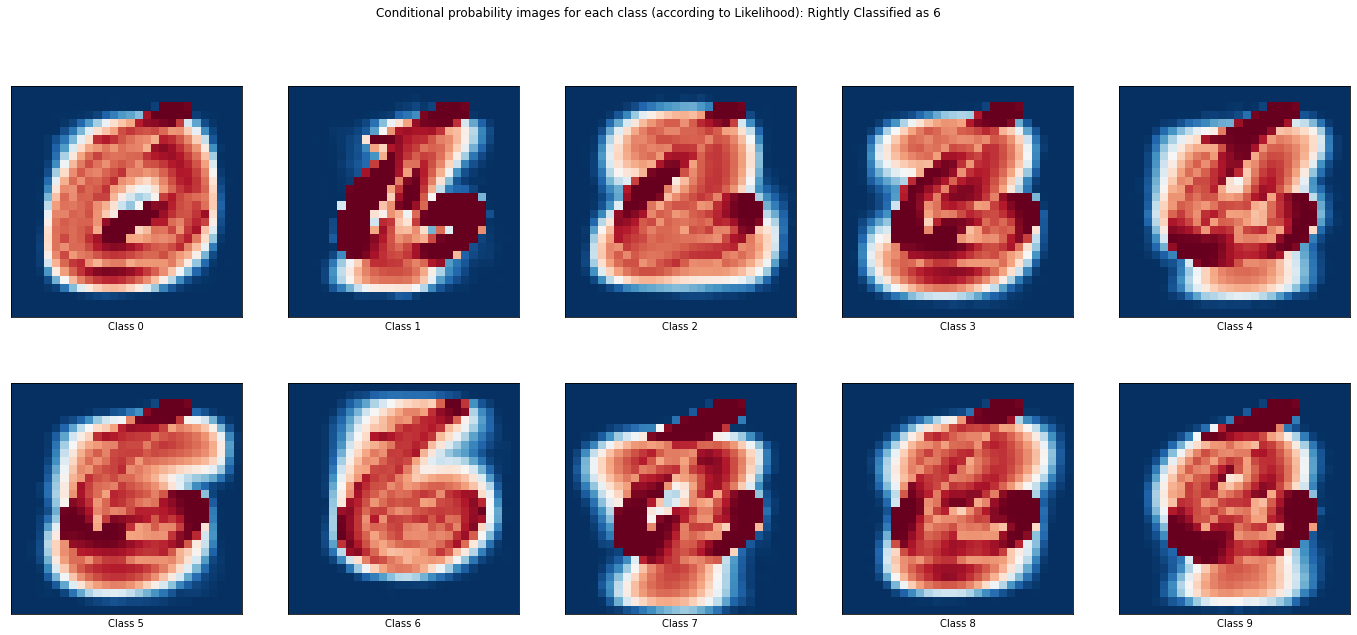

In [ ]:
likeli = nb[1]
likli = likeli[9999]
matplot.subplots(2,5, figsize=(24,10))
for i in range(10):
    l1 = matplot.subplot(2, 5, i + 1)
    l1.imshow(likli[i].reshape(28, 28), interpolation='nearest',cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i' % i)
matplot.suptitle('Conditional probability images for each class (according to Likelihood): Rightly Classified as 6')
matplot.show()

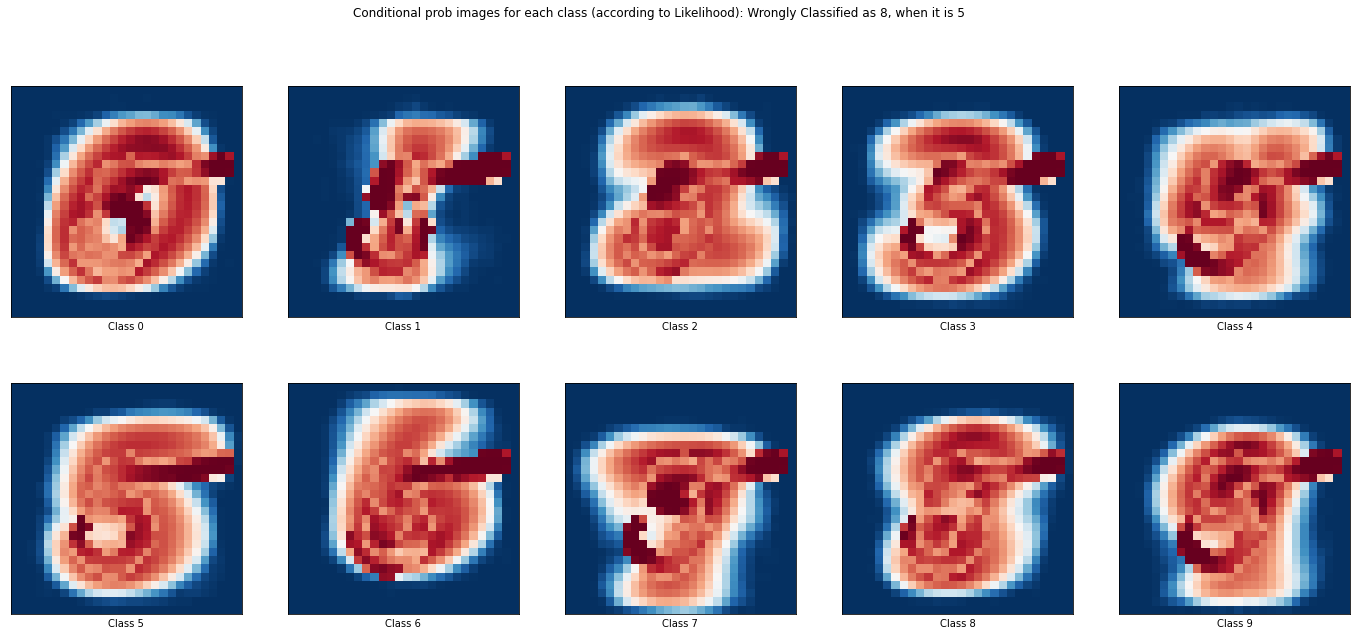

In [ ]:
likli = likeli[9998]
matplot.subplots(2,5, figsize=(24,10))
for i in range(10):
    l1 = matplot.subplot(2, 5, i + 1)
    l1.imshow(likli[i].reshape(28, 28), interpolation='nearest',cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i' % i)
matplot.suptitle('Conditional prob images for each class (according to Likelihood): Wrongly Classified as 8, when it is 5')
matplot.show()